In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("edf.csv")
print(df.head())

FileNotFoundError: ignored

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,22076.000000,20949.000000,22075.000000,22075.000000,22075.000000
mean,494.885622,2.137811,66.602673,69.419298,68.471438
std,288.026078,1.473545,15.385894,14.758806,15.457044
min,0.000000,0.000000,0.000000,11.000000,6.000000
25%,246.000000,1.000000,56.000000,59.000000,58.000000
50%,490.000000,2.000000,67.000000,70.000000,69.000000
75%,744.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22076 entries, 0 to 22075
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           22076 non-null  int64  
 1   Gender               22076 non-null  object 
 2   EthnicGroup          20777 non-null  object 
 3   ParentEduc           20737 non-null  object 
 4   LunchType            22076 non-null  object 
 5   TestPrep             20757 non-null  object 
 6   ParentMaritalStatus  21215 non-null  object 
 7   PracticeSport        21615 non-null  object 
 8   IsFirstChild         21380 non-null  object 
 9   NrSiblings           20949 non-null  float64
 10  TransportMeans       19811 non-null  object 
 11  WklyStudyHours       21392 non-null  object 
 12  MathScore            22075 non-null  float64
 13  ReadingScore         22075 non-null  float64
 14  WritingScore         22075 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [ ]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1299
ParentEduc             1339
LunchType                 0
TestPrep               1319
ParentMaritalStatus     861
PracticeSport           461
IsFirstChild            696
NrSiblings             1127
TransportMeans         2265
WklyStudyHours          684
MathScore                 1
ReadingScore              1
WritingScore              1
dtype: int64

In [ ]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5       71.0          71.0          74.0  


**Gender countplot**

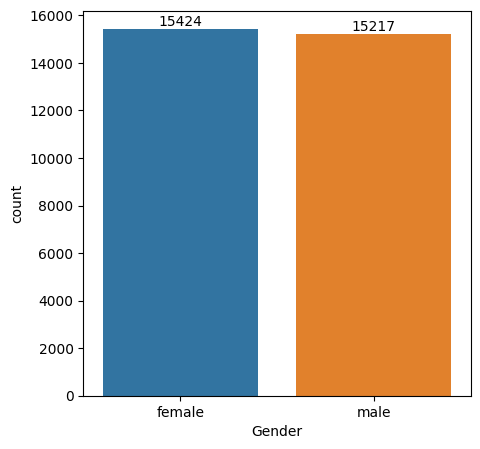

In [ ]:
plt.figure(figsize= (5,5))
ax=sns.countplot(data = df,x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


**Heat map of parent education**

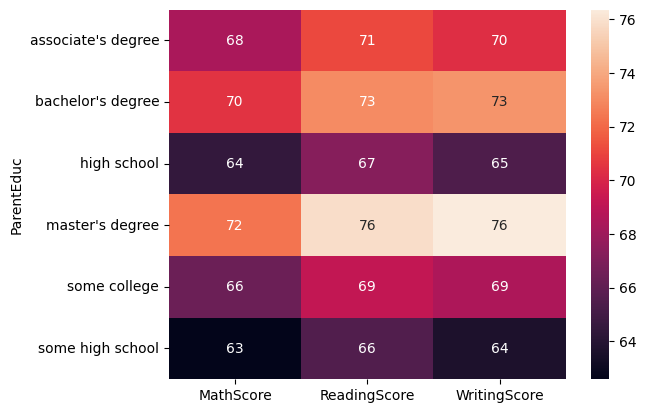

In [ ]:
sns.heatmap(gb,annot=True)
plt.show()

**MathScore**

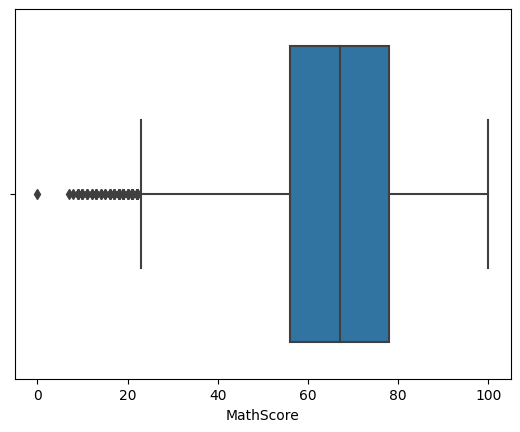

In [ ]:
sns.boxplot(data = df , x="MathScore")
plt.show()

**ReadingScore**

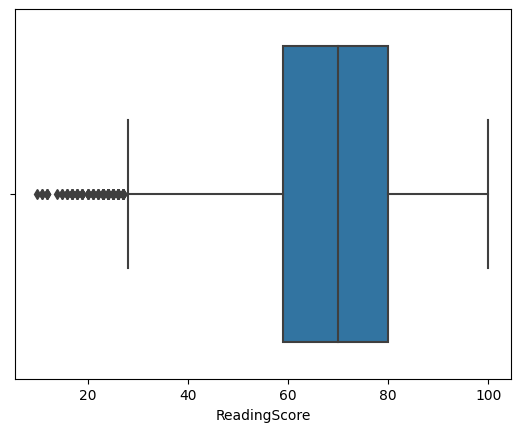

In [ ]:
sns.boxplot(data = df , x="ReadingScore")
plt.show()

**WritingScore**

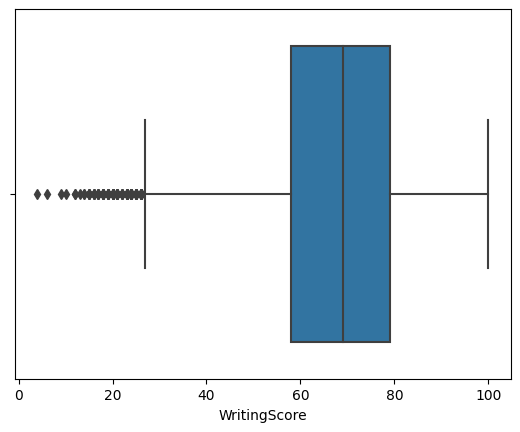

In [ ]:
sns.boxplot(data = df , x="WritingScore")
plt.show()

In [ ]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


**distribution of Ethnic groups**

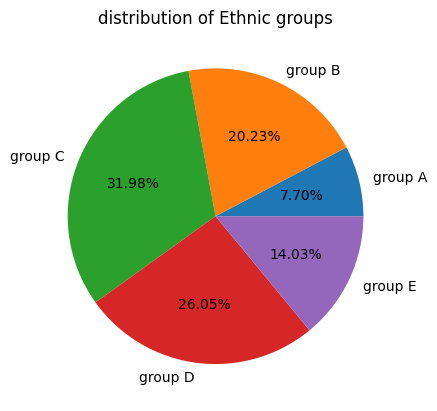

In [ ]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
l = ["group A","group B","group C","group D","group E"]
plt.pie(mlist,labels=l, autopct = "%4.2f%%")
plt.title("distribution of Ethnic groups")
plt.show()

**Countplot of Ethnic group**

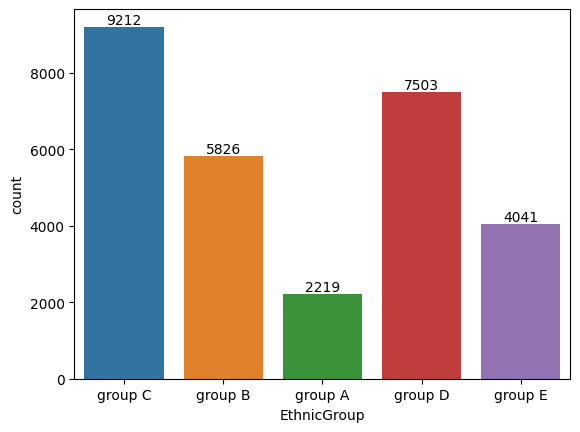

In [ ]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])
plt.show(ax)

**Tight layout of Gender**

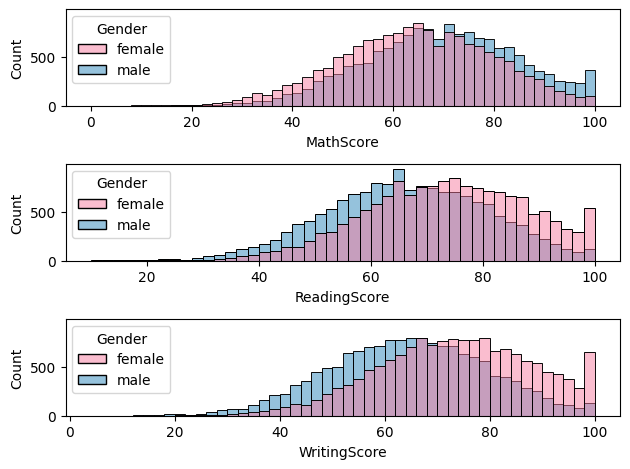

In [ ]:
fig, axes = plt.subplots(3,sharey=True)
palette = {'female': '#F77CA0', 'male': '#2D87BB'}
sns.histplot(data=df, x='MathScore',binwidth=2, ax=axes[0], hue='Gender',palette=palette)
sns.histplot(data=df, x='ReadingScore',binwidth=2, ax=axes[1], hue='Gender',palette=palette)
sns.histplot(data=df, x='WritingScore',binwidth=2, ax=axes[2], hue='Gender',palette=palette)
plt.tight_layout()

**Scatterplot of Gender**

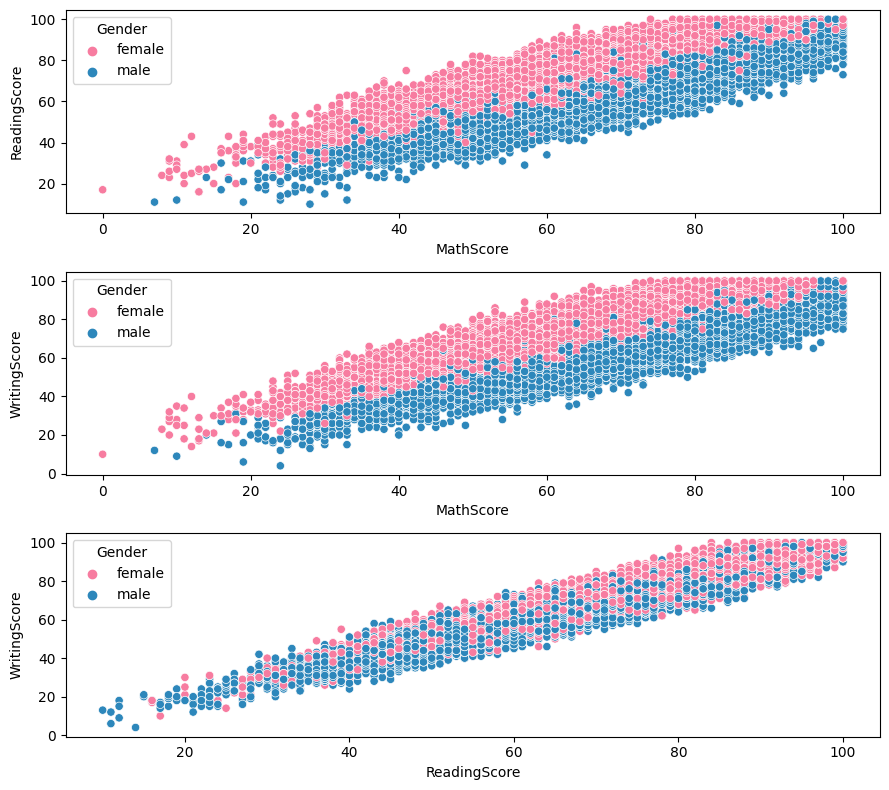

In [ ]:
fig, axes = plt.subplots(3, figsize=(9,8))
palette = {'female': '#F77CA0', 'male': '#2D87BB'}
sns.scatterplot(data=df, x='MathScore', y='ReadingScore', hue='Gender', palette=palette, ax=axes[0])
sns.scatterplot(data=df, x='MathScore', y='WritingScore', hue='Gender', palette=palette, ax=axes[1])
sns.scatterplot(data=df, x='ReadingScore', y='WritingScore', hue='Gender', palette=palette, ax=axes[2])
plt.tight_layout();

**Sub plot of ParentEducation**

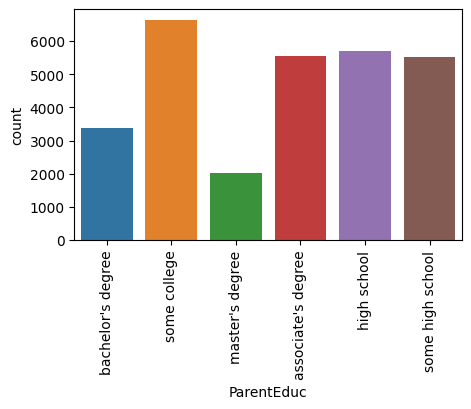

MathScore        ReadingScore        WritingScore       
                         mean median         mean median         mean median
ParentEduc                                                                  
associate's degree  68.365586   69.0    71.124324   71.0    70.299099   71.0
bachelor's degree   70.466627   71.0    73.062020   73.0    73.331069   73.5
high school         64.435731   64.0    67.213997   67.0    65.421136   66.0
master's degree     72.336134   73.0    75.832921   77.0    76.356896   77.0
some college        66.390472   66.0    69.179708   69.0    68.501432   69.0
some high school    62.584013   63.0    65.510785   65.0    63.632409   64.0

In [ ]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='ParentEduc')
plt.xticks(rotation=90)

plt.show()

df.groupby(['ParentEduc'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

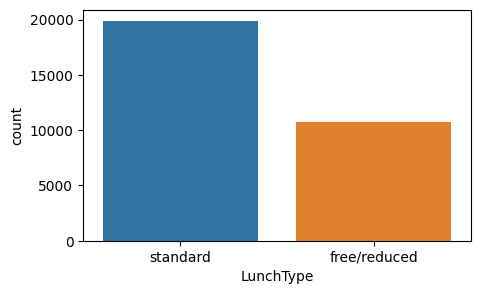

MathScore        ReadingScore        WritingScore       
                   mean median         mean median         mean median
LunchType                                                             
free/reduced  58.862332   59.0    64.189735   64.0    62.650522   63.0
standard      70.709370   71.0    72.175634   73.0    71.529716   72.0

In [ ]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='LunchType')

plt.show()

df.groupby(['LunchType'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])


**TESTPrep**

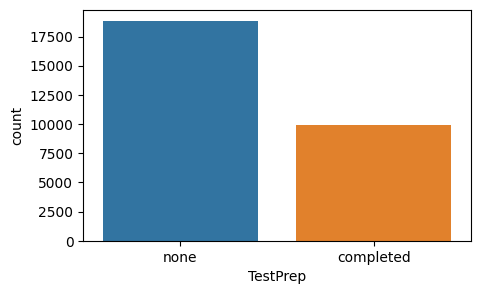

MathScore        ReadingScore        WritingScore       
               mean median         mean median         mean median
TestPrep                                                          
completed  69.54666   70.0    73.732998   74.0    74.703265   75.0
none       64.94877   65.0    67.051071   67.0    65.092756   65.0

In [ ]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='TestPrep')

plt.show()

df.groupby(['TestPrep'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])